#### 1. Decision trees for classification

 - Sequence of if-else statements about individual features
 - Captures non-linear relationships between features and labels
 - Objective is to infer class labels
 - Divides the feature space into regions
     - These are called decision regions and inside them all feature instances are assigned to one class label
     - Decision boundaries: surface separating different decision regions
     - Classification trees produce rectangular decision regions (while linear classifiers separate the plane using straight line boundaries)
     
 - Hierarchy of nodes:
     - Each node shows a question or a prediction
     - Root node = no parent node, gives rise to two children
     - Internal node = one parent node, gives rise to two children
     - Leaf node = prediction is made here, no children nodes
     - So the whole tree is made in such a way so that each leaf has a single predominant class label
 - To produce the purest leaf possible, the tree is using "Information Gain"
     - The nodes are grown recursively = each internal node or leaf depends on the state of its predecessors
     - To produce the purest leafs possible, at each node the tree asks a questions about one feature and a split point
     - To select which feature and split point to ask about, the tree maximises the IG obtained after each split
     - If the IG is null, the node is declared a leaf (or if you've reached the max depth specified)
     - Unclear if the tree searches many several features and split points, calculating the IG for each and keeping the ones that have maximised it) ?
     - Many criteria are used to calculate the information gain (impurity of a node) e.g. entropy or Gini index
     - Reduction of entropy = information gain
     
     <img src="ml_assets/ig_tree_class.png" style="height: 100px;"/>


 - Learn more: https://en.wikipedia.org/wiki/Decision_tree_learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



In [5]:
cure = load_breast_cancer()
features = pd.DataFrame(scale(cure['data']), columns = cure['feature_names'])
target = pd.DataFrame(cure['target'], columns=['Type'])
df = pd.concat([target,features],axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=30, random_state=1)

In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=12)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 1 0 1]


In [22]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score which corresponds to the fraction of correct predictions made on the test set
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=24)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.933
Accuracy achieved by using the gini index: 0.900


In [16]:
# from mlxtend.plotting import plot_decision_regions

# def plot_labeled_decision_regions(X,y, models):
#     '''Function producing a scatter plot of the instances contained 
#     in the 2D dataset (X,y) along with the decision 
#     regions of two trained classification models contained in the
#     list 'models'.
    
#     Parameters
#     ----------
#     X: pandas DataFrame corresponding to two numerical features 
#     y: pandas Series corresponding the class labels
#     models: list containing two trained classifiers 
    
#     '''
#     if len(models) != 2:
#         raise Exception('''Models should be a list containing only two trained classifiers.''')
#     if not isinstance(X, pd.DataFrame):
#         raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
#     if not isinstance(y, pd.Series):
#         raise Exception('''y has to be a pandas Series corresponding to the labels.''')
#     fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
#     for i, model in enumerate(models):
#         plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
#         ax[i].set_title(model.__class__.__name__)
#         ax[i].set_xlabel(X.columns[0])
#         if i == 0:
#             ax[i].set_ylabel(X.columns[1])
#             ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
#             ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
#     plt.tight_layout()

# # Import LogisticRegression from sklearn.linear_model
# from sklearn.linear_model import  LogisticRegression

# # Instatiate logreg
# logreg = LogisticRegression(random_state=1)

# # Fit logreg to the training set
# logreg.fit(X_train, y_train)

# # Define a list called clfs containing the two classifiers logreg and dt
# clfs = [logreg, dt]

# # Review the decision regions of the two classifiers
# plot_labeled_decision_regions(X_test, y_test, clfs)

#### 2. Decision trees for regression

 - Greater flexibility to capture non-linearity in the data (but not fully)
 - Linear regression models cannot capture such relationships in the data
      <img src="ml_assets/dec_tree_reg.png" style="height: 300px;"/>
 - The node's impurity is measured by the mean squared error of that node's targets
 - So the regression tree tries to find the splits that produce the leafs where in each leaf the target values are on average the closest possible to the mean-value of the labels in that particular leaf
 
      <img src="ml_assets/ig_tree_reg.png" style="height: 200px;"/>

 - Prediction: for a new instance of features which has "reached" a certain leaf, the predicted "y" is computed as the average of the target variables contained in the leaf (i.e. the mean predicted "y" of the leaf)


In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
features_boston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
target_boston = pd.DataFrame(boston['target'], columns=['Type'])
df_boston = pd.concat([target_boston,features_boston],axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features_boston, target_boston,
                                                    test_size=30, random_state=1)

In [35]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [36]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.88


In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.49
Regression Tree test set RMSE: 3.88


#### 3. Variance-Bias trade off

 - Overfitting: a model learns "perfectly" the training set data but does not approximate/predict effectively new data
     - Has low predictive power / high test set error
     - Has low training set error
 - Underfitting: a model is inflexible on the training set / not flexible enough to capture the relationship between features and labels
     - It has roughly equal training set and test set errors, but both are quite high
 
 - Generalization error: how well can a model generalize on unseen data
     - > GE of f = Bias error ** 2 + Variance error + Irreducible error
     - Bias tells how much on average f_hat and f are different
         - High bias models lead to underfitting
     - Variance tells you how much f_hat is inconsistent over different training sets
         - It follows data so closely that it loses the actual model - can lead to overfitting

      <img src="ml_assets/bias_variance.png" style="height: 400px;"/>
      <img src="ml_assets/bias_variance_visual.png" style="height: 400px;"/>

 - The generalization error cannot be estimated directly because f is unknown, there's only one dataset and noise cannot be predicted
 - Instead, the generalization error can be approximated as the test set error that is measured by splitting the data into training and test set
 - Use cross-validation for multiple tests and training sets
     - In K-fold cross validation the CV error is the average of error from each fold
 - If the issue is high variance (that is if CV error > than training set error of f)
     - f overfits the data so decrease model complexity or gather more data
 - If the issue is high bias (that is if CV error ~= training set error of f > desired error)
     - f underfits the data so increase model complexity or gather more relevant features
 
 - Learn more: https://en.wikipedia.org/wiki/Bias–variance_tradeoff

In [40]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [42]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.24


In [43]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.23


#### 4. Ensemble methods - voting classifier

 - Advantages of CART:
     - Easy to use, understand and interpret
     - Describe non-linear relationship
     - Standardisation or normalisation (preprocessing) is generally not required
 - Limitations of CART:
     - The produced decision boundaries are orthogonal/rectangular
     - Highly sensitive to small variations in the data
     - Unconstrained CARTs may overfit the data (high variance)
 
 
 - Ensemble models train different models on the same dataset and then decide based on the majority (or similar measure) of the output of these models
 
 - The "meta-model" aggregates the predictions of the individual models, so that the final prediction is more robust and less prone to errors
 
 
<img src="ml_assets/ensemble.png" style="height: 300px;"/>



 - A voting classifier is an ensemble of (different) models fit on the same training data set:
     - N classifiers making P1..PN predictions
     - The final predicted class is based on the majority of "votes" (class predicted) of all models

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED=4

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.971
K Nearest Neighbours : 0.965
Classification Tree : 0.854


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.959


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 5. Bootstrap aggregation or bagging

 - Ensemble formed by models using the same training algorithm but in different subsets of data
 - Has the effect of reducing the overall variance of individual models in the ensble
 - It "creates" N samples (with replacement) from the original training dataset
 
<img src="ml_assets/bagging.png" style="height: 300px;"/>

 - A bagging classifier generates predictions using the majority voting
 - A bagging regressor generates predictions taking the average of individual predictions
 - Out-of-bag evaluation:
     - Typically not all of the training set will be bootstrap aggregated
     - Around of the training data 1/3 might be kept out of sample, constituting the OOB sample
     - These can be used as "test" set to evaluate the performance of bagging

<img src="ml_assets/oob.png" style="height: 300px;"/>



In [49]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [51]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.95


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [54]:
# OOB

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

In [55]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.912, OOB accuracy: 0.955


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


####  6. Random forests

 - In bagging the base estimator can be any model
 - Random forests are ensemble methods that use decision trees as their base estimators
 - Each estimator is trained on a different bootstrapped sample with the same size as the training set
 - But random forests introduce further randomisation as only "d" features ( without replacement) can be sampled at each node where "d" < number of features
 - "d" usually defaults to the square root of the total number of features
 - Feature importance describes how much the tree nodes are using a particular feature to reduce impurity
<img src="ml_assets/random_forests.png" style="height: 300px;"/>



In [63]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.21


<ipython-input-63-a425bf5b38d7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


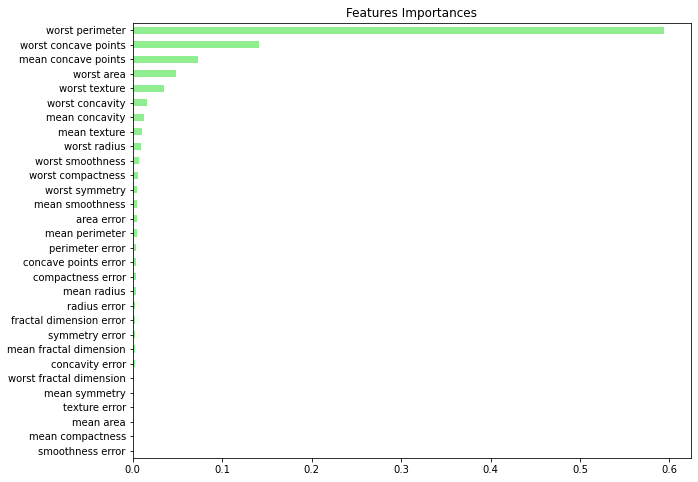

In [64]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10,8))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

#### 7. Boosting

#### 8. Hyper-parameter tuning